## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_with_mouse_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
results_with_mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = len(results_with_mouse_data["Mouse ID"].unique())
mouse_count


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
dup_mice = results_with_mouse_data[results_with_mouse_data.duplicated(["Mouse ID", "Timepoint"])]
print(dup_mice["Mouse ID"].unique())


['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = results_with_mouse_data.loc[results_with_mouse_data["Mouse ID"] == "g989"]
dup_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = results_with_mouse_data.loc[results_with_mouse_data["Mouse ID"] != "g989"]
clean_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_results["Mouse ID"].unique())
clean_mouse_count


248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#groupby drug regimen
drugs_grouped = clean_results.groupby(["Drug Regimen"])

#create dataframe and claculate mean, median, variance, standard deviation, and SEM using groupby drug and column "Tumor Volume (mm3)"
summary_stats_df = pd.DataFrame({"Tumor_Mean": drugs_grouped["Tumor Volume (mm3)"].mean(),
                                 "Tumor_Median": drugs_grouped["Tumor Volume (mm3)"].median(),
                                 "Tumor_Variance": drugs_grouped["Tumor Volume (mm3)"].var(),
                                 "Tumor_Std_Deviation": drugs_grouped["Tumor Volume (mm3)"].std(),
                                 "Tumor_SEM": drugs_grouped["Tumor Volume (mm3)"].sem(),
                                 "Mouse Count": drugs_grouped["Mouse ID"].count()
                                })
summary_stats_df


,Tumor_Mean,Tumor_Median,Tumor_Variance,Tumor_Std_Deviation,Tumor_SEM,Mouse Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar Plots

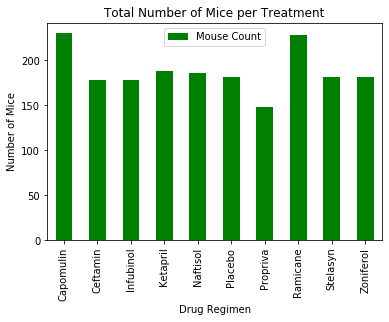

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
#create dataframe with total mice for all timepoints for each drug
mouse_count_df = pd.DataFrame({"Mouse Count": drugs_grouped["Mouse ID"].count()})

mouse_count_by_drug_chart = mouse_count_df.plot(kind = "bar", color = "green", title = "Total Number of Mice per Treatment")
mouse_count_by_drug_chart.set_ylabel("Number of Mice")
mouse_count_by_drug_chart



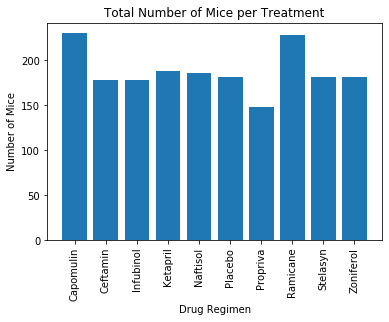

In [51]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mouse_count_df.index,mouse_count_df["Mouse Count"])
plt.xticks( rotation="vertical")
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()



## Pie Plots

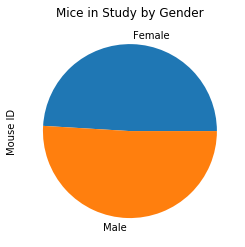

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_results.groupby(["Sex"])

mouse_count_by_gender = gender_group["Mouse ID"].count()
mouse_count_by_gender.plot(kind = "pie", title = "Mice in Study by Gender")



In [67]:
mouse_count_by_gender

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

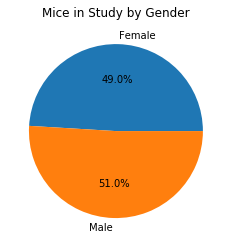

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_count_by_gender, autopct="%1.1f%%",labels=["Female","Male"])
plt.title("Mice in Study by Gender")
plt.show()



## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#caluculate for Capomulin:
study_tumor_capomulin = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin"]
study_tumor_capomulin = study_tumor_capomulin.sort_values(["Mouse ID", "Timepoint"])
study_tumor_capomulin = study_tumor_capomulin.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_capomulin = study_tumor_capomulin["Tumor Volume (mm3)"]
quartiles_capomulin = final_tumor_capomulin.quantile([0.25,0.5,0.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

#caluculate for Ceftamin:
study_tumor_ceftamin = clean_results.loc[clean_results["Drug Regimen"] == "Ceftamin"]
study_tumor_ceftamin = study_tumor_ceftamin.sort_values(["Mouse ID", "Timepoint"])
study_tumor_ceftamin = study_tumor_ceftamin.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_ceftamin = study_tumor_ceftamin["Tumor Volume (mm3)"]
quartiles_ceftamin = final_tumor_ceftamin.quantile([0.25,0.5,0.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

#caluculate for Infubinol:
study_tumor_infubinol = clean_results.loc[clean_results["Drug Regimen"] == "Infubinol"]
study_tumor_infubinol = study_tumor_infubinol.sort_values(["Mouse ID", "Timepoint"])
study_tumor_infubinol = study_tumor_infubinol.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_infubinol = study_tumor_infubinol["Tumor Volume (mm3)"]
quartiles_infubinol = final_tumor_infubinol.quantile([0.25,0.5,0.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

#caluculate for Ramicane:
study_tumor_ramicane = clean_results.loc[clean_results["Drug Regimen"] == "Ramicane"]
study_tumor_ramicane = study_tumor_ramicane.sort_values(["Mouse ID", "Timepoint"])
study_tumor_ramicane = study_tumor_ramicane.drop_duplicates(subset=["Mouse ID"], keep = "last")
final_tumor_ramicane = study_tumor_ramicane["Tumor Volume (mm3)"]
quartiles_ramicane = final_tumor_ramicane.quantile([0.25,0.5,0.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

print(f"""
Capomulin quartiles :
{quartiles_capomulin}""")
print(f"iqr_capomulin : {iqr_capomulin}")
print(f"lower_bound_capomulin = {lower_bound_capomulin}")
print(f"upper_bound_capomulin = {upper_bound_capomulin}")
#print(final_tumor_capomulin)

print(f"""
Ceftamin quartiles : 
{quartiles_ceftamin}""")
print(f"iqr_ceftamin : {iqr_ceftamin}")
print(f"lower_bound_ceftamin = {lower_bound_ceftamin}")
print(f"upper_bound_ceftamin = {upper_bound_ceftamin}")
#print(final_tumor_ceftamin)

print(f"""
Infubinol quartiles :
{quartiles_infubinol}""")
print(f"iqr_infubinol : {iqr_infubinol}")
print(f"lower_bound_infubinol = {lower_bound_infubinol}")
print(f"upper_bound_infubinol = {upper_bound_infubinol}")
#print(final_tumor_infubinol)

print(f"""
Ramicane quartiles :
{quartiles_ramicane}""")
print(f"iqr_ramicane : {iqr_ramicane}")
print(f"lower_bound_ramicane = {lower_bound_ramicane}")
print(f"upper_bound_ramicane = {upper_bound_ramicane}")
#print(final_tumor_ramicane)



Capomulin quartiles :
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
iqr_capomulin : 7.781863460000004
lower_bound_capomulin = 20.70456164999999
upper_bound_capomulin = 51.83201549

Ceftamin quartiles : 
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
iqr_ceftamin : 15.577752179999997
lower_bound_ceftamin = 25.355449580000002
upper_bound_ceftamin = 87.66645829999999

Infubinol quartiles :
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
iqr_infubinol : 11.477135160000003
lower_bound_infubinol = 36.83290494999999
upper_bound_infubinol = 82.74144559000001

Ramicane quartiles :
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
iqr_ramicane : 9.098536719999998
lower_bound_ramicane = 17.912664470000003
upper_bound_ramicane = 54.30681135


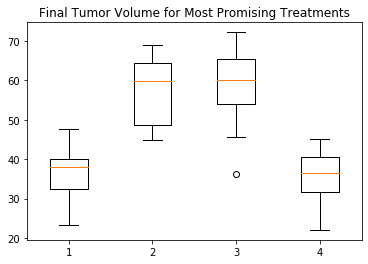

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
all_drugs = [final_tumor_capomulin,final_tumor_ceftamin, final_tumor_infubinol, final_tumor_ramicane ]
ax1.set_title("Final Tumor Volume for Most Promising Treatments")
ax1.boxplot(all_drugs)
plt.show()




## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
